# Fundamentos da Web Semântica
# Projeto - Fase 3

## Introdução

### Identificação do grupo
- André Monteiro, nº51718, 24 horas
- Gil Silva, nº57682, 24 horas

Este documento apresenta a modelação em OWL e SWRL dos processos do Tribunal do Santo Ofício, focando-se nos processos, acusações, sentenças, pessoas, locais e eventos envolvidos. Esta modelação foi feita no âmbito da terceira fase do projeto de Fundamentos de Web Semântica.

A modelação foi inicialmente planeada no formato Turtle e depois reformulada e testada usando a ferramenta Protegé 5.5.0. Neste documento pode ser encontrada a explicação e justificação das regras e restrições pensadas pelos alunos, bem como a sua modelação em OWL no formato Turtle e ainda a verificação da sua validade no programa Protegé.

Para a validação da ontologia foram selecionados e modelados os processos 2300418, 2299986, 2299987, 2302216 e 2373176 em todos os aspetos mencionados acima. Estes processos contêm relações interessantes relações familiares e recidivismo, o que permite por em prática as várias regras da ontologia.

# Modelação


### Tribunais da Inquisição

> O Tribunal do Santo Ofício estendeu a sua acção a todo o país e a quase todos os territórios submetidos à Coroa portuguesa no longo período da sua existência (1536-1821). Para efeitos do exercício do poder inquisitorial, as diferentes regiões do Reino estavam adstritas aos tribunais de Lisboa, de Coimbra e de Évora (os de Tomar, Porto e Lamego tiveram vida efémera). As ilhas do Atlântico, o Brasil e os territórios portugueses da costa ocidental de África, dependiam do tribunal de Lisboa e os da costa oriental africana dependiam do tribunal de Goa, criado em 1560.

Durante a história do Tribunal do Santo Ofício foram estabelecidas as seguintes inquisições:
- Inquisição de Coimbra
- Inquisição de Évora
- Inquisição de Goa
- Inquisição de Lisboa
- Inquisição de Lamego
- Inquisição do Porto
- Inquisição de Tomar

Esta restrição pode ser modelada através de uma enumeração de indivíduos, usando a propriedade `owl:oneOf` da seguinte forma:
```
inq:Inquisition owl:oneOf (inq:IC inq:IE inq:IG inq:IL inq:ILM inq:IP inq:IT).

inq:IC rdfs:label "Inquisição de Coimbra"@pt.
inq:IE rdfs:label "Inquisição de Évora"@pt.
inq:IG rdfs:label "Inquisição de Goa"@pt.
inq:IL rdfs:label "Inquisição de Lisboa"@pt.
inq:ILM rdfs:label "Inquisição de Lamego"@pt.
inq:IP rdfs:label "Inquisição de Porto"@pt.
inq:IT rdfs:label "Inquisição de Tomar"@pt.
```

Eis a respetiva modelação em Protegé:

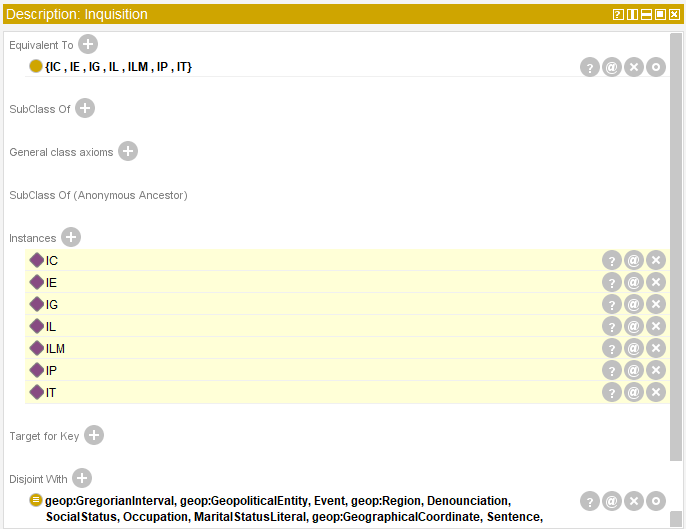

### Processos
Um processo está associado a um único número, a um único tribunal da inquisição, a um único réu. Pode ainda ter várias acusações e sentenças. Cada instância de acusação e sentença, no entanto, pode apenas dizer respeito a um processo, de forma inversamente funcional.  

Um processo pode também estar associado a vários eventos, entre os quais à prisão do réu, a apresentação do réu e o auto-da-fé onde foram anunciadas as sentenças. Um processo pode apenas estar associado a uma instância de cada um destes eventos (de forma funcional, portanto). Além disso, alguns destes eventos, como a prisão e a apresentação, podem apenas dizer respeito a um processo (de forma inversamente funcional). Segue-se a nossa modelação em OWL destas restrições:

```
inq:Process a rdfs:Class;
    rdfs:label "Processo"@pt.

inq:processNo a owl:DatatypeProperty,
                owl:FunctionalProperty,
                owl:InverseFunctionalProperty;
  rdfs:domain inq:Process;
  rdfs:range  xsd:string.

inq:court a owl:ObjectProperty,
            owl:FunctionalProperty;
  rdfs:domain inq:Process;
  rdfs:range  inq:Inquisition.

inq:hasDefendant a owl:ObjectProperty;
                   owl:FunctionalProperty;
  owl:inverseOf inq:defendantIn;
  rdfs:domain inq:Process;
  rdfs:range  inq:Defendant.

inq:hasAutoDaFe a owl:ObjectProperty,
                  owl:FunctionalProperty;
  rdfs:domain inq:Process;
  rdfs:range  inq:AutoDaFe.

inq:hasArrest a owl:ObjectProperty,
                owl:FunctionalProperty,
                owl:InverseFunctionalProperty;
  rdfs:domain inq:Process;
  rdfs:range  inq:AutoDaFe.

inq:hasPresentation a owl:ObjectProperty,
                      owl:FunctionalProperty,
                      owl:InverseFunctionalProperty;
  rdfs:domain inq:Process;
  rdfs:range  inq:Presentation.

inq:hasAccusation a owl:ObjectProperty,
                    owl:InverseFunctionalProperty;
  rdfs:domain inq:Process;
  rdfs:range  acc:Accusation.

inq:hasSentence a owl:ObjectProperty,
                  owl:InverseFunctionalProperty,
                  owl:IrreflexiveProperty;
  rdfs:domain inq:Process;
  rdfs:range  stc:Sentence.

```

A Inquisição Portuguesa seguiu, durante o seu periodo de atividade, quatro regimentos distintos:

> "Datam de 1541 as primeiras instruções portuguesas para o seu funcionamento, por ocasião do estabelecimento do tribunal em Coimbra, e o primeiro regimento só foi dado em 1552. A Inquisição teve segundo regimento em 1613, um terceiro em 1640 e o último data de 1774." (https://digitarq.arquivos.pt/details?id=2299703)

Pode ser interessante classificar os processos de acordo com o regimento em vigor. Isto é possível (https://www.w3.org/TR/2012/REC-owl2-primer-20121211/#Advanced_Use_of_Datatypes), desde que sejam criados tipos de dados apropriados para a definição das restrições:
```
inq:BeforeFirstRegiment a rdfs:Datatype;
  owl:onDatatype xsd:date;
  owl:withRestrictions (
    [xsd:minInclusive "1541-01-01"^^xsd:date]
    [xsd:maxExclusive "1552-01-01"^^xsd:date]
  ).
inq:DuringFirstRegiment a rdfs:Datatype;
  owl:onDatatype xsd:date;
  owl:withRestrictions (
    [xsd:minInclusive "1552-01-01"^^xsd:date]
    [xsd:maxExclusive "1613-01-01"^^xsd:date]
  ).
inq:DuringSecondRegiment a rdfs:Datatype;
  owl:onDatatype xsd:date;
  owl:withRestrictions (
    [xsd:minInclusive "1613-01-01"^^xsd:date]
    [xsd:maxExclusive "1640-01-01"^^xsd:date]
  ).
inq:DuringThirdRegiment a rdfs:Datatype;
  owl:onDatatype xsd:date;
  owl:withRestrictions (
    [xsd:minInclusive "1640-01-01"^^xsd:date]
    [xsd:maxExclusive "1774-01-01"^^xsd:date]
  ).
inq:DuringFourthRegiment a rdfs:Datatype;
  owl:onDatatype xsd:date;
  owl:withRestrictions (
    [xsd:minInclusive "1774-01-01"^^xsd:date]
    [xsd:maxExclusive "1821-01-01"^^xsd:date]
  ).
 ```
 Tendo estes tipos de dados definidos, podemos então categorizar os processos:
 ```
inq:PreFirstRegimentProcess 
  owl:intersectionOf (
    inq:Process
    [
      a owl:Restriction;
      owl:onProperty inq:hasArrest;
      owl:someValuesFrom
        [
          a owl:Restriction;
          owl:onProperty inq:date;
          owl:someValuesFrom inq:BeforeFirstRegiment;
        ]
    ]
  ).
 ```
A definição das restantes classes segue a mesma lógica.

Para além disso, pode ser feita a distinção entre um periodo pré-pombalino e pós-pombalino:

> "As leis pombalinas, a que declarou abolida a distinção entre cristãos novos e cristãos velhos e a que equiparou o Santo Ofício aos outros tribunais régios, retirando a censura da sua alçada, fizeram o Santo Ofício perder a sua anterior vitalidade." (https://digitarq.arquivos.pt/details?id=2299703)

A distinção entre cristãos novos e cristãos velhos foi abolida com a lei de 25 de Maio de 1773, e parece ser refletida no regimento de 1774. Para simplificar, vamos assumir que o periodo pré-pombalino abrange os primeiros três regimentos e que o pós-pombalino abrange o quarto e último. Para modelar esta distinção, podemos usar os termos `owl:unionOf` e `owl:equivalentClass`:

```
inq:PrePombalineProcess 
  owl:unionOf (
    inq:PreFirstRegimentProcess
    inq:FirstRegimentProcess
    inq:SecondRegimentProcess
    inq:ThirdRegimentProcess
  ).

inq:PostPombalineProcess 
  owl:equivalentClass inq:FourthRegimentProcess.
```
As imagens seguintes exemplificam a utilização destas regras para a modelação dos processos 2302216 e 2299986:

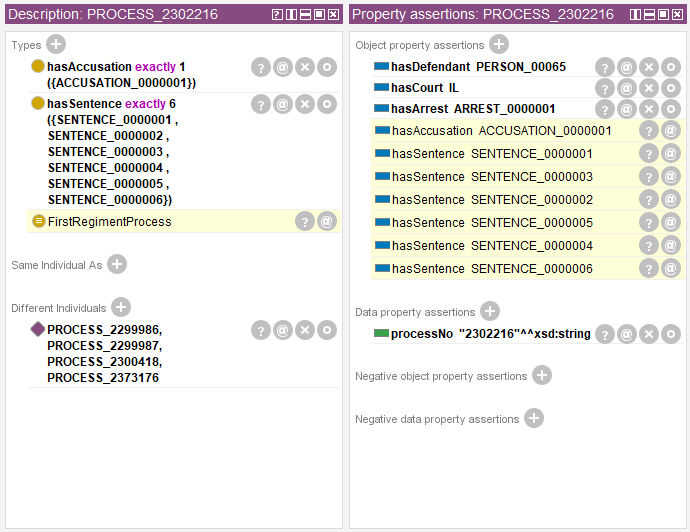

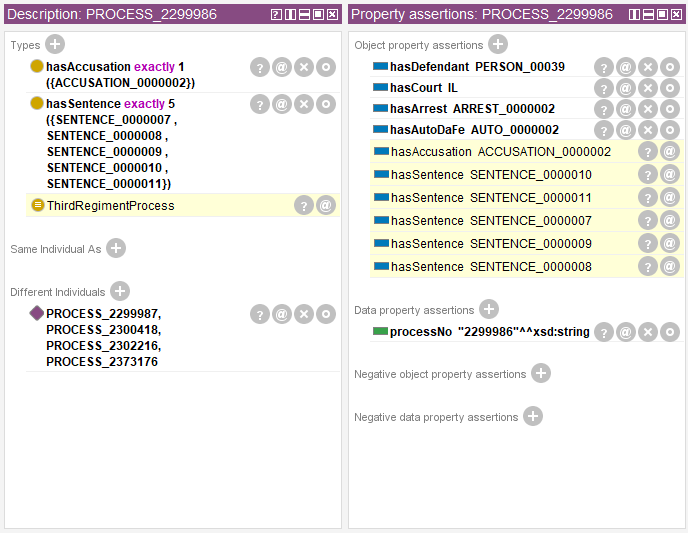

Uma vez que o número de acusações e sentenças de cada processo é sabido com certeza, podemos fazer a sua ligação com o processo usando uma restição de cardinalidade e uma enumeração em vez de várias afirmações.

A classificação dos processos entre pré-pombalinos e pós-pombalinos é evidenciada pela imagem seguinte, onde é feita uma simples interrogação à base de dados:

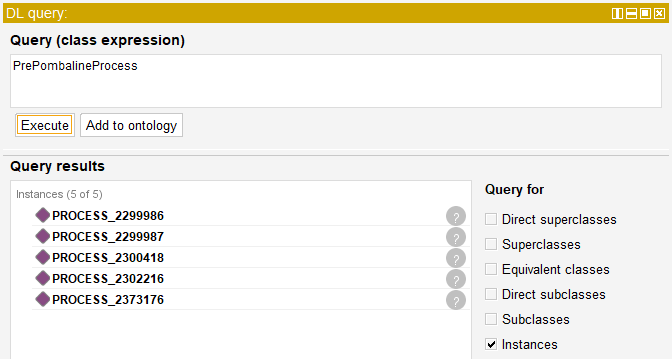

### Réus

Os réus são os alvos dos processos do Tribunal do Santo ofício. São definidos da seguinte forma:
```
inq:Defendant 
  rdfs:label "Réu"@pt;
  owl:equivalentClass [
    a owl:Restriction;
    owl:onProperty inq:defendantIn;
    owl:minCardinality 1;
  ].

```
Os réus podem ser categorizados de diversas formas, e uma delas é pela sua reincidência: pode ser desistente ou reincidente. Um réu é desistente se estiver implicado em apenas um processo. É reincidente se estiver implicado em dois ou mais processos. Esta restrição pode ser modelada da seguinte forma:
```
inq:Desistent owl:intersectionOf (
   inq:Defendant
   [
      a owl:Restriction;
      owl:onProperty inq:defendantIn;
      owl:cardinality 1;
   ]
 ).
inq:Recidivist owl:intersectionOf (
    inq:Defendant
    [
       a owl:Restriction;
       owl:onProperty inq:defendantIn;
       owl:minCardinality 2;
    ]
  ).
```
Uma vez que estas classes definem uma partição binária do conjunto dos réus, podemos definir uma delas como o complemento da outra, dentro deste mesmo conjunto:
```
inq:Desistent owl:intersectionOf (
    inq:Defendant
    [owl:complementOf inq:Recidivist]
  ).
```

Uma vez que a semântica do OWL está definida sob a hipótese do mundo aberto, é impossível identificar os desistentes através da cardinalidade dos processos em que estão envolvidos. Isto também reflete o que sabemos sobre os dados, pois uma vez que nem todos os documentos foram preservados, alguns processos podem ter sido perdidos:

> "O mau estado de conservação de um conjunto de documentos não permitiu que se completassem alguns registos descritivos, impedindo a reprodução em formato digital antes da intervenção do serviço de restauro estar concluída. Não tem sido possível recuperar todos os documentos pelo seu avançado estado de degradação." 
(https://digitarq.arquivos.pt/details?id=2299703)

Ainda assim, caso se saiba ao certo quais os processos em uma determinada pessoa é ré, podem definir-se as seguintes restrições:
```
inq:ExampleRecidivist a [
    a owl:Restriction;
    owl:onProperty inq:defendantIn;
    owl:allValuesFrom [owl:oneOf (inq:ExampleProcess1 inq:ExampleProcess2)];
    owl:cardinality 2;
  ].

    inq:ExampleDesistant a [
        a owl:Restriction;
        owl:onProperty inq:defendantIn;
        owl:hasValue inq:ExampleProcess3;
        owl:cardinality 1;
  ].
```
As imagens seguintes apresentam um desistente e um recidivista:

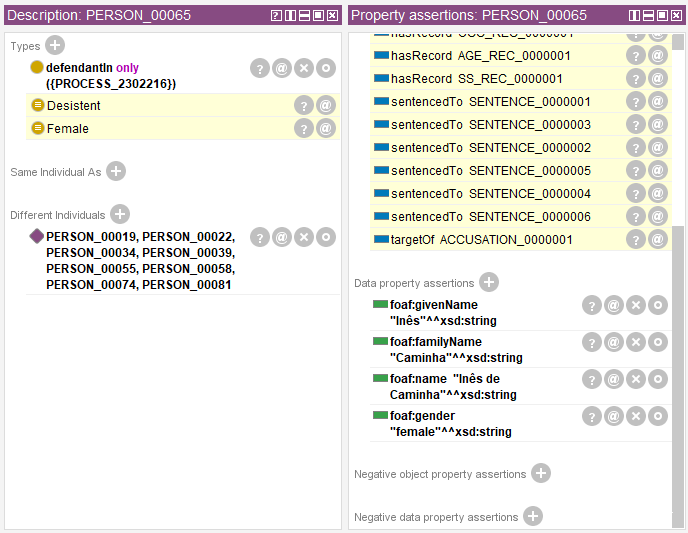


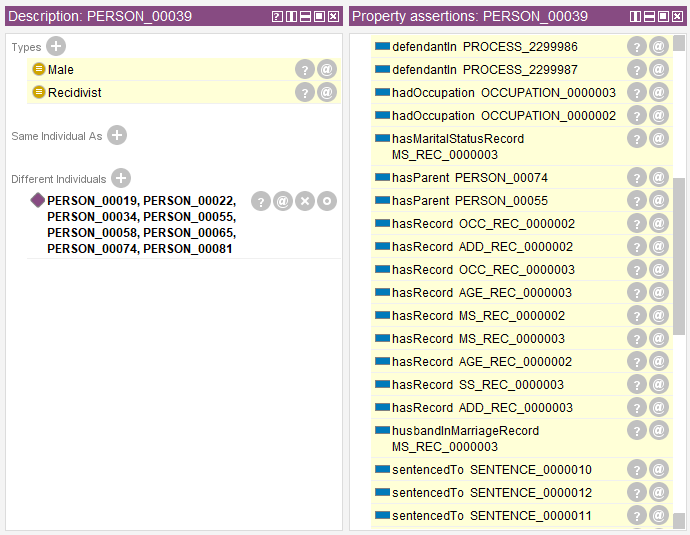

No segundo exemplo, não é necessária uma restrição pois o réu já está ao certo envolvido em mais que um processo.

### Acusações, sentenças, ocupações

Uma sentença pode ter uma duração:
```
inq:sentenceDuration 
  rdfs:domain inq:Sentence;
  rdfs:range xsd:duration.
```

Uma vez que a ligação entre os réus e as suas acusações e sentenças é mediada por um processo, pode ser útil estabelecê-la de forma direta, se for dito que uma pessoa foi alvo de uma certa acusação se for réu num processo que contém essa acusação:
```
inq:targetOf owl:inverseOf inq:hasTarget;
  owl:propertyChainAxiom (inq:defendantIn inq:hasAccusation);
  rdfs:domain inq:Defendant;
  rdfs:range inq:Accusation.

inq:sentencedTo owl:inverseOf inq:sentenceOf;
  owl:propertyChainAxiom (inq:defendantIn inq:hasSentence);
  rdfs:domain inq:Defendant;
  rdfs:range inq:Sentence.

inq:hadOccupation
  owl:propertyChainAxiom (
  inq:defendantIn
  inq:hasOccupationRecord
  inq:occupation
).

inq:ageAtArrest
  owl:propertyChainAxiom (
  inq:hasAgeRecord
  inq:age
).
```
Com esta última propriedade, podemos definir mais uma categoria de réus: os infratores menores (young offenders), ou réus que foram presos quando ainda era menores de idade (a idade que vamos usar é puramente exemplificativa; esta categoria não reflete necessariamente o sistema jurídico da época).

```
inq:YoungOffender owl:intersectionOf (
    inq:Defendant
    [
      a owl:Restriction;
      owl:onProperty inq:ageAtArrest;
      owl:someValuesFrom inq:BelowAgeOfCriminalResponsability;
    ]
   ).
```
onde `inq:BelowAgeOfCriminalResponsability` é definido como:
```
inq:BelowAgeOfCriminalResponsability a rdfs:Datatype;
   owl:onDatatype xsd:integer;
   owl:withRestrictions ([xsd:maxExclusive 16]).
```
É de notar que a propriedade `inq:ageOfArrest`, e consequentemente a classe `inq:Defendant` é impossível definir no programa Protegé, uma vez que não é possível definir cadeias mistas de Object Properties e Datatype Properties.

A imagem seguinte apresenta algumas inferências feitas pelo reasoner usando estas propriedades:

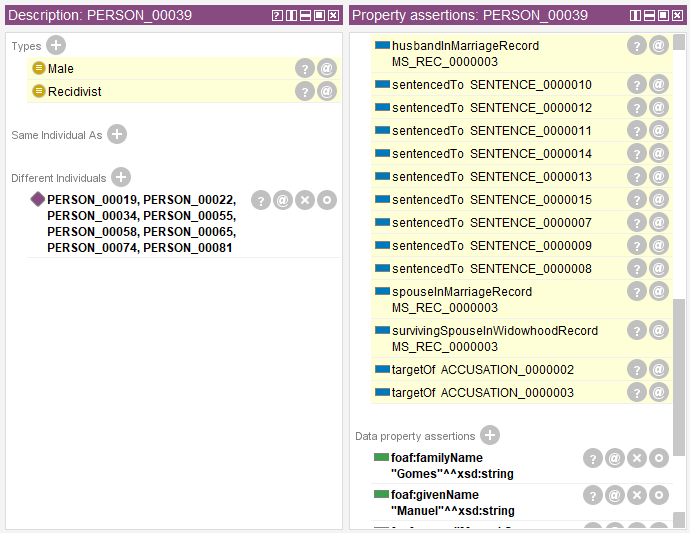

### Naturalidade
A naturalidade de uma pessoa é uma propriedade funcional com contradomínio uma região ou entidade geopolítica:
```
inq:birthplace a owl:ObjectProperty;
    rdfs:domain inq:Person;
    rdfs:range [owl:unionOf (geop:Region geop:GeopoliticalEntity)].
```

### Género
Tendo em conta a época e contexto dos processos, foram utilizadas as seguintes restrições para modelar os géneros das pessoas na triplestore:
```
inq:Female owl:intersectionOf (
      foaf:Person
      [
        a owl:Restriction;
          owl:onProperty foaf:gender;
          owl:hasValue "female";
      ]
  ).

    inq:Male owl:intersectionOf (
        foaf:Person
        [
            a owl:Restriction;
            owl:onProperty foaf:gender;
            owl:hasValue "male";
        ]
    ).

    inq:Male owl:disjointWith inq:Female.

```
Estas classes são importantes, pois serão os domínios e contradomínios de certas propriedades que serão definidas mais à frente. As imagens apresentadas anteriormente mostram também inferências sobre estas classes.

### Registos (de idade, estado civil, ofício, etc.)

Certos dados pessoais podem variar ao longo da vida das pessoas. Uma vez que uma pessoa pode ser referida em vários processos ao longo de muitos anos, é lógico que tenha idade, estado civil, ocupação, etc. diferentes em cada processo. Para além disso, informações estáticas que permitissem inferir estas informações, como a data de nascimento ou casamento, não estão presentes no conjunto de dados nem podem ser calculadas com exatidão. Para capturar esta dimensão temporal dos dados, as ligações entre as pessoas e as suas idades, ocupações, estados civis (e respetivos esposos), etc. são feitas sob a forma de registos. Estes registos são entidades intermédias que estão associadas a um processo, de forma a que se possa determinar uma cronologia aproximada através dos eventos referidos nestes processos. A forma geral destes registos é a seguinte:
```
inq:Record
  owl:unionOf (
    inq:SocialStatusRecord
    inq:AgeRecord
    inq:AddressRecord
    inq:OccupationRecord
    inq:MaritalStatusRecord
  );
  rdfs:label "Registo"@pt.
 
 inq:accordingTo a owl:ObjectProperty,
                   owl:IrreflexiveProperty;
     rdfs:domain inq:Record;
     rdfs:range  inq:Process.

 inq:hasRecord a owl:ObjectProperty,
                 owl:InverseFunctionalProperty,
                 owl:IrreflexiveProperty;
      rdfs:domain foaf:Person;
      rdfs:range  foaf:Record.
```

A classe `inq:Record` tem várias subclasses apropriadas para registar os vários tipos de dados biográficos. Segue-se uma descrição de como foi modelado cada um destes tipos.

#### Estatuto social
O estatuto social de uma pessoa pode variar ao longo da sua vida. Um escravo, por exemplo, pode passar a escravo forro. Para além disso, pode haver uma informação quantitativa associada ao estatuto social, tipicamente associada aos cristãos novos (ex. "um quarto de cristão novo"). Eis a modelação dos registos dos estatutos sociais:
```
 inq:socialStatus a owl:ObjectProperty,
                    owl:IrreflexiveProperty;
     rdfs:domain inq:SocialStatusRecord;
     rdfs:range  inq:SocialStat
  inq:ratio a owl:DatatypeProperty,
              owl:FunctionalProperty;
      rdfs:domain inq:SocialStatus;
      rdfs:range xsd:decimal.

  inq:newChristianRatio
     rdfs:subPropertyOf inq:ratio;
     rdfs:domain inq:NewChristian.
```

Exemplos de subclasses de `inq:SocialStatus` incluem `inq:NewChristian`, `inq:OldChristian`, `inq:Preto`, `inq:PretoForro`, `inq:Escravo` e `inq:Indiano`.
Um exemplo do uso destas classes e propriedades é:
```
inq:PN00032
    foaf:name "Maria Da Fonseca";
    inq:hasSocialStatusRecord [
       inq:socialStatus [inq:newChristianRatio 0.25];
       inq:accordingTo  inq:PR2299947;
    ].
```

#### Idade
A idade é a informação mais sujeita a mudar ao longo dos processos. A modelação é semelhante, mas faz uso de owl:DatatypeProperty uma vez que o valor numérico é um literal.
```
inq:hasAgeRecord a owl:ObjectProperty;
    rdfs:subPropertyOf inq:hasRecord;
    rdfs:range         inq:AgeRecord.
 inq:age a owl:DatatypeProperty;
         a owl:FunctionalProperty;
     rdfs:domain inq:AgeRecord;
     rdfs:range  xsd:integer.
```
Exemplo:
```
inq:PN00032
   foaf:name "Maria Da Fonseca";
   inq:hasAgeRecord
  [
    inq:age         45;
    inq:accordingTo inq:PR2299947;
  ].
```

#### Morada
A morada é semelhante à idade e também é simples:
```
inq:hasAddressRecord a owl:ObjectProperty;
    rdfs:subPropertyOf inq:hasRecord;
    rdfs:range         inq:AddressRecord.
 inq:address a owl:ObjectProperty;
             a owl:FunctionalProperty;
    rdfs:domain inq:AddressRecord;
    rdfs:range  [owl:unionOf (geop:Region geop:GeopoliticalEntity)].
```
Exemplo:
```
inq:PN00032
    foaf:name "Maria Da Fonseca";
    inq:hasAddressRecord
    [
      inq:address     dbr:Trancoso\,_Portugal;
      inq:accordingTo inq:PR2299947;
    ];
```

#### Ocupações
As ocupações são semelhantes às moradas:
```
inq:hasOccupationRecord a owl:ObjectProperty;
  rdfs:subPropertyOf inq:hasRecord;
  rdfs:range         inq:OccupationRecord.
inq:occupation a owl:ObjectProperty;
            a owl:FunctionalProperty;
  rdfs:domain inq:OccupationRecord;
  rdfs:range  occ:Occupation.
```
Exemplo:
```
inq:PN00016
  foaf:name       "Nuno Alvares Pereira";
  inq:hasOccupationRecord [
     inq:occupation  [a occ:Mercador];
     inq:accordingTo inq:PR2299947;
  ].
```

#### Estado civil
O estado civil é o mais complexo dos registos, uma vez que estabelece ligações entre pessoas na triplestore. O modelo geral destes registos é o seguinte:
```
inq:hasMaritalStatusRecord a owl:ObjectProperty;
  rdfs:subPropertyOf inq:hasRecord;
  rdfs:domain        foaf:Person;
  rdfs:range         inq:MaritalStatusRecord.
  
inq:maritalStatus a owl:DatatypeProperty,
                    owl:FunctionalProperty;
  rdfs:domain inq:MaritalStatusRecord;
  rdfs:range  inq:MaritalStatusString.
```
A classe `inq:MaritalStatusString` é um pequeno vocabulário controlado:
```
inq:MaritalStatusString
  a rdfs:Datatype;
    owl:onDatatype xsd:string;
    owl:withRestrictions (
        [xsd:pattern "\b(?:single|married|widowed)\b"]
    ).
```

##### Casamento
O casamento é um dos estados civis que estabelece ligações entre pessoas (2 exatamente). Um registo de casamento é um `inq:MaritalStatus` com `inq:maritalStatus "married"` e com cardinalidade 2 na propriedade `inq:spouse`. Estas restrição foi modeladas da seguinte forma:
```
inq:MarriageRecord owl:intersectionOf (
  inq:MaritalStatusRecord
  [
    a owl:Restriction;
    owl:onProperty inq:maritalStatus;
    owl:hasValue "married";
  ]
  [
    a owl:Restriction;
    owl:onProperty inq:spouse;
    owl:cardinality 2;
  ]
).
```
Normalmente, a relação de casamento é modelada através de uma propriedade simétrica. Uma vez que o nosso modelo de registos temporais é um pouco mais complexo, esta simetria foi estabelecida através da propriedade `owl:inverseOf`. Eis o modelo geral dos registos de casamento:
```
inq:spouseInMaritalStatusRecord;
    rdfs:subPropertyOf inq:hasMaritalStatusRecord;
    owl:inverseOf      inq:spouse;
    rdfs:range         inq:MarriageRecord.

inq:spouse
  rdfs:domain inq:MarriageRecord.
```

Tendo em conta a época e a situação legal do casamento na época em que estes registos foram produzidos, faz sentido introduzir uma dimensão de género na modelação:
```

inq:wife rdfs:subPropertyOf inq:spouse;
         rdfs:range inq:Female.
inq:husband rdfs:subPropertyOf inq:spouse;
         rdfs:range inq:Male.

inq:husbandInMaritalStatusRecord 
    rdfs:subPropertyOf inq:spouseInMaritalStatusRecord;
    owl:inverseOf      inq:husband.

inq:wifeInMaritalStatusRecord 
    rdfs:subPropertyOf inq:spouseInMaritalStatusRecord;
    owl:inverseOf      inq:wife.
```

Foram ainda incluidos os seguintes axiomas para ter acesso aos cônjuges, sem a mediação do registo.
```
spouseInMarriageRecord(?s1, ?mr) ^ spouse(?mr, ?s2) ^ differentFrom(?s1, ?s2) -> hadSpouse(?s1, ?s2)

hadSpouse(?s, ?w) ^ Female(?w) -> hadWife(?s, ?w)

hadSpouse(?s, ?h) ^ Male(?h) -> hadHusband(?s, ?h)
```
Segue-se a descrição de um registo de casamento, com as respetivas inferências:

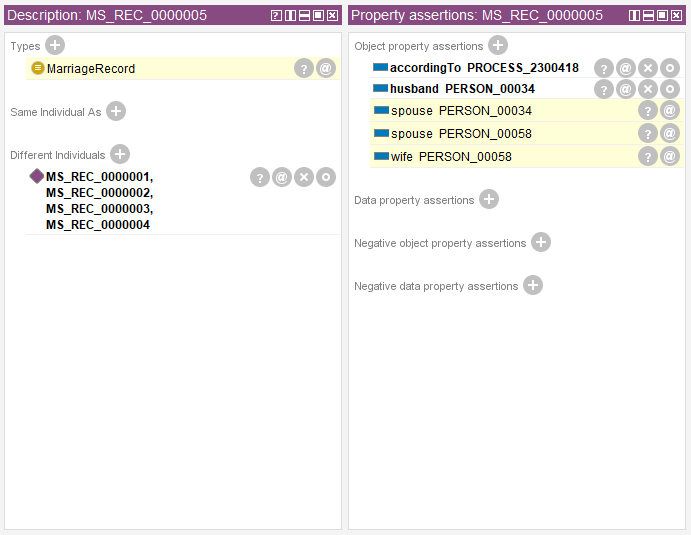


##### Viuvez
A viuvez é semelhante ao casamento (e na verdade uma subclasse do mesmo), mas não é propriamente simétrica, uma vez que um dos cônjuges é viúvo e outro é falecido. Este laço foi então estabelecido da seguinte forma:
```
inq:WidowhoodRecord owl:intersectionOf (
   inq:MarriageRecord
   [
     a owl:Restriction;
     owl:onProperty inq:maritalStatus;
     owl:hasValue "widowed";
   ]
).

inq:survivingSpouse
  rdfs:subPropertyOf inq:spouse;
  rdfs:domain  inq:WidowhoodRecord;
  rdfs:range foaf:Person.
inq:widow 
    rdfs:subPropertyOf inq:survivingSpouse,
                       inq:wife;
    rdfs:range inq:Female.
inq:widower
    rdfs:subPropertyOf inq:survivingSpouse,
                       inq:husband;
    rdfs:range inq:Male.

inq:survivingSpouseInWidowhoodRecord
    rdfs:subPropertyOf inq:spouseInMarriageRecord;
    owl:inverseOf      inq:survivingSpouse;
    rdfs:range         inq:WidowhoodRecord.

inq:widowerInWidowhoodRecord 
    rdfs:subPropertyOf inq:survivingSpouseInWidowhoodRecord,
                       inq:husbandInMaritalStatusRecord
    owl:inverseOf      inq:widower.

inq:widowInWidowhoodRecord 
    rdfs:subPropertyOf inq:survivingSpouseInWidowhoodRecord,
                       inq:wifeInMarriageRecord;
    owl:inverseOf      inq:widow.       

inq:deceasedSpouse
  rdfs:subPropertyOf inq:spouse;  
  rdfs:domain inq:WidowhoodRecord.
inq:deceasedWife 
    rdfs:subPropertyOf inq:deceasedSpouse,
                       inq:wife;
    rdfs:range inq:Female.
inq:deceasedHusband 
    rdfs:subPropertyOf inq:deceasedSpouse,
                       inq:husband;
    rdfs:range inq:Male.

inq:deceasedSpouseInWidowhoodRecord
    rdfs:subPropertyOf inq:spouseInMarriageRecord;
    owl:inverseOf      inq:deceasedSpouse;
    rdfs:range         inq:WidowhoodRecord.

inq:diceasedHusbandInWidowhoodRecord 
    rdfs:subPropertyOf inq:diceasedSpouseInWidowhoodRecord,
                       inq:husbandInMaritalStatusRecord;
    owl:inverseOf      inq:diceasedHusband.

inq:diceasedWifeInWidowhoodRecord 
    rdfs:subPropertyOf inq:diceasedSpouseInWidowhoodRecord,
                       inq:wifeInMarriageRecord;
    owl:inverseOf      inq:diceasedWife.         
```

Segue-se a descrição de um registo de viuvez (esposa desconhecida):

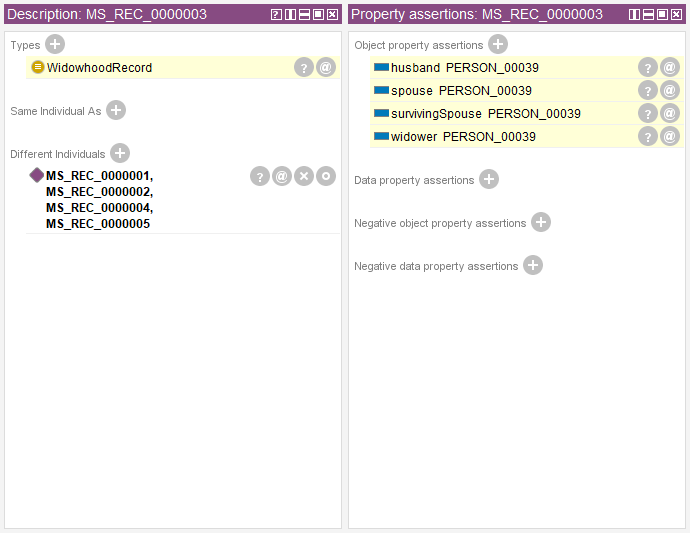

### Laços familiares
Os laços familiares são, em princípio, estáticos, e portanto não foram modelados como registos.
```
inq:hasParent a owl:ObjectProperty;
  owl:inverseOf inq:parentOf;
  rdfs:domain foaf:Person;
  rdfs:range foaf:Person.

inq:hasFather a owl:FunctionalProperty;
  owl:inverseOf inq:fatherOf;
  rdfs:subPropertyOf inq:hasParent;
  rdfs:range inq:Male.

inq:fatherOf rdfs:subPropertyOf inq:parentOf.

inq:hasMother a owl:FunctionalProperty;
  owl:inverseOf inq:motherOf;
  rdfs:subPropertyOf inq:hasParent;
  rdfs:range inq:Female.

inq:motherOf rdfs:subPropertyOf inq:parentOf.

```

Foram ainda incluídos alguns axiomas para inferir relações de parentesco mais extensivas.
```
inq:grandmotherOf rdfs:subPropertyOf inq:grandparentOf;
	owl:propertyChainAxiom (inq:motherOf inq:parentOf).
inq:grandfatherOf rdfs:subPropertyOf inq:grandparentOf;
	owl:propertyChainAxiom (inq:fatherOf inq:parentOf).
```

Para definir relações familiares mais extensivas e para inferir informações adicionais regras SWRL. Algumas destas regras podem ser descritas em sintaxes como Turtle ou de Mancheste, enquanto que outras são mais facilmente descritas em SWRL:
```
inq:hasParent(?p, ?q) ^ inq:Female(?q) -> inq:hasMother(?p, ?q)
inq:hasParent(?p, ?q) ^ inq:Male(?q) -> inq:hasFather(?p, ?q)
```
Podemos ter outras regras para determinar se uma pessoa tem irmãos dos mesmos pais: 
```
inq:Female(?mother) ^ inq:Male(?father) ^ inq:hasFather(?sibling1, ?father) ^ inq:hasFather(?sibling2, ?father) ^ inq:hasMother(?sibling1, ?mother) ^ 
inq:hasMother(?sibling2, ?mother) ^ differentFrom(?sibling1, ?sibling2) -> inq:hasFullSibling(?sibling2, ?sibling1)

inq:Male(?b) ^ inq:hasFullSibling(?p, ?b) -> inq:hasBrother(?p, ?b)

inq:Female(?s) ^ inq:hasFullSibling(?p, ?s) -> inq:hasSister(?p, ?s)
```

Alem disto podemos tambem traçar outros laços familiares como tio e tia:
```
inq:hasSister(?x, ?y) ^ inq:parentOf(?x, ?z) -> inq:hasAunt(?z, ?y)
inq:hasBrother(?x, ?y) ^ inq:parentOf(?x, ?z) -> inq:hasUncle(?z, ?y)
```

Apesar de não estarem explícitos no domínio laços familiares como padrasto, madrasta e meia irmã/o, achamos que seria interessante escrever regras para definir estas relações de parentesco:
```

hasParent (?p,?p1) ^ hasParent (?p,?p2) ^ hadSpouse (?p1,?p2)  ^ hadSpouse(?p1,?p3) ^ differentFrom (?p2,?p3) ^ differentFrom(?p1,?p2) ->hasStepParent(?p,?p3)


Male(?m) ^ hasStepParent(?p,?m) -> hasStepFather (?p,?m)

Female(?f) ^ hasStepParent(?p,?f) -> hasStepMother (?p, ?f)

Person(?p1) ^ Person (?p2) ^ Person(?p3) ^ parentOf(?p3, ?p2) ^ hasStepParent(?p1,?p3) -> hasStepSibling(?p1,?p2)


Male(?m) ^ hasStepSibling (?p,?m) -> hasStepBrother (?p,?m)


Female(?f) ^ hasStepSibling (?p,?f) -> hasStepSister(?p,?f)
```

A imagem seguinte mostra o resultado destas regras:

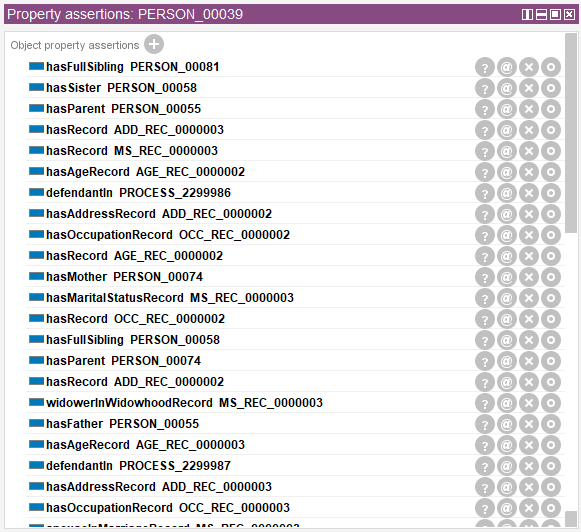

### Locais

A representação da geografia e da geopolítica é um assunto complexo. Em primeiro lugar, um país, estado, município ou freguesia não devem ser confundidos com o seu território, que é uma entidade puramente geográfica. Em segundo, a configuração do território destas entidades políticas muda ao longo do tempo. Em terceiro lugar, regiões puramente geográficas têm limites difusos e discutíveis. O que se segue é um esboço de uma ontologia para representar regiões e entidades geopolíticas.

Uma região é um conjunto de coordenadas geográficas.
```
geop:latitude a owl:FunctionalProperty,
                owl:DatatypeProperty,
                owl:IrreflexiveProperty,
                owl:AsymmetricalProperty;
  rdfs:domain geop:GeographicalCoordinate;
  rdfs:range xsd:decimal.
geop:longitude  a owl:FunctionalProperty,
                owl:DatatypeProperty,
                owl:IrreflexiveProperty,
                owl:AsymmetricalProperty;
  rdfs:domain geop:GeographicalCoordinate;
  rdfs:range xsd:decimal.
geop:GeographicalCoordinate owl:intersectionOf (
  [
    a owl:Restriction;
    owl:onProperty geop:latitude;
    owl:cardinality 1;
  ]
  [
    a owl:Restriction;
    owl:onProperty geop:longitude;
    owl:cardinality 1;
  ]
).
```
As coordenadas estão dentro de uma região:
```
geop:in a owl:ObjectProperty;
  owl:inverseOf geop:contains;
  rdfs:domain geop:GeographicalCoordinate;
  rdfs:range geop:Region.
```
E uma região pode conter subregiões. Se uma coordenada pertence a uma região, pertence também a uma super-região dessa região. De forma semelhante ao SKOS, foram concebidas as propriedades `geop:transitiveSubRegionOf` e `geop:transitiveSuperRegionOf` para evidenciar este facto.
```
geop:subRegionOf a owl:ObjectProperty;
  owl:inverseOf geop:superRegionOf;
  rdfs:subPropertyOf geop:transitiveSubRegionOf.

geop:transitiveSubRegionOf a owl:ObjectProperty,
                             owl:TransitiveProperty;
  owl:inverseOf geop:transitiveSuperRegionOf;
  rdfs:domain geop:Region;
  rdfs:range geop:Region.

```

Se uma coordenada está dentro de uma região faz sentido que esteja também dentro das suas super-regiões. Podemos garantir isto através de uma regra SWRL

```
in(?c, ?r) ^ transitiveSubRegionOf(?r, ?sr) -> in(?c, ?sr)
```

De forma exemplificativa, algumas regiões foram descritas com estas propriedades, como pode ser consultado na imagem seguinte:

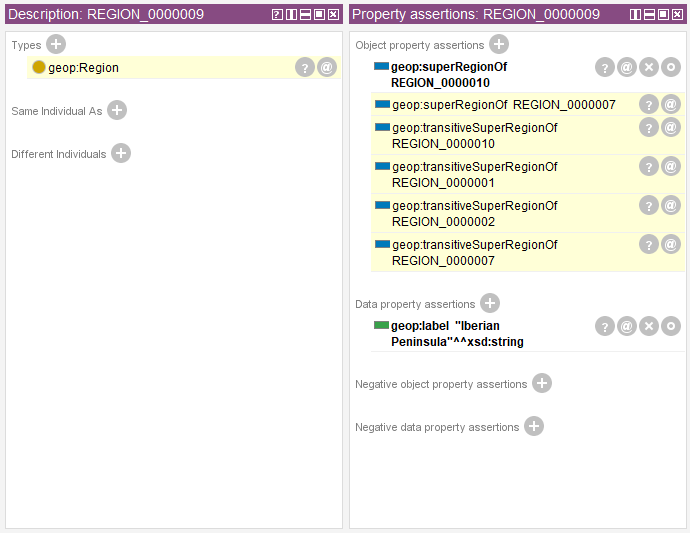

Entidades políticas como países ou concelhos têm configurações territoriais diferentes, mantendo-se o mesmo país ou concelho. Uma configuração territorial abrange um determinado espaço e um determinado período temporal:
```
geop:TerritorialConfiguration owl:intersectionOf (
  [
    a owl:Restriction;
    owl:onProperty geop:spatialRange;
    owl:cardinality 1;
  ] 
  [
    a owl:Restriction;
    owl:onProperty geop:temporalRange;
    owl:cardinality 1;
  ]
).

geop:spatialRange a owl:ObjectProperty;
  rdfs:domain geop:TerritorialConfiguration;
  rdfs:range geop:Region.
geop:temporalRange a owl:ObjectProperty;
  rdfs:domain geop:TerritorialConfiguration;
  rdfs:range geop:GregorianInterval.

geop:GregorianInterval owl:intersectionOf (
  [
    a owl:Restriction;
    owl:onProperty geop:beginDate;
    owl:cardinality 1;
  ]
  [
    a owl:Restriction;
    owl:onProperty geop:endDate;
    owl:maxCardinality 1;
  ]
).

geop:TerminatedGregorianInterval owl:intersectionOf (
  geop:GregorianInterval
  [
    a owl:Restriction;
    owl:onProperty geop:endDate;
    owl:cardinality 1;
  ]
).

geop:UnerminatedGregorianInterval owl:intersectionOf (
  geop:GregorianInterval
  [
    a owl:Restriction;
    owl:onProperty geop:endDate;
    owl:cardinality 0;
  ]
).

geop:beginDate a owl:DatatypeProperty,
                 owl:FunctionalProperty;
  rdfs:domain geop:GregorianInterval;
  rdfs:range xsd:dateTime.

geop:endDate a owl:DatatypeProperty,
               owl:FunctionalProperty;
  rdfs:domain geop:GregorianInterval;
  rdfs:range xsd:dateTime.
```

Uma entidade geopolítica tem pelo menos uma configuração territorial.
```
geop:GeopoliticalEntity owl:equivalentClass [
  a owl:Restriction;
  owl:onProperty geop:hasTerritorialConfiguration;
  owl:minCardinality 1;
].
```

Um país é talvez a entidade geopolítica mais importante.
```
geop:Country owl:intersectionOf (
  geop:GeopoliticalEntity
  [
    a owl:Restriction;
    owl:onProperty geop:hasSubdivision;
    owl:allValuesFrom geop:FirstLevelSubdivision;
  ]
).
```
Mas tem subdivisões administrativas. Cada país tem o seu tipo de subdivisão: distrito, estado, província, etc. Para abstrair estas diferenças, estas subdivisões primárias foram chamadas de subdivisões de nível 1:
```
geop:subdivisionOf 
  owl:inverseOf geop:hasSubdivision;
  owl:subPropertyOf geop:transitiveSubdivisionOf.

geop:GeopoliticalSubdivision rdfs:subClassOf geop:GeopoliticalEntity.

geop:FirstLevelSubdivision owl:intersectionOf (
  geop:GeopoliticalSubdivision
  [
    a owl:Restriction;
    owl:onProperty geop:hasSubdivision;
    owl:allValuesFrom geop:SecondLevelSubdivision;
  ]
  [
    a owl:Restriction;
    owl:onProperty geop:subdivisionOf;
    owl:allValuesFrom geop:Country;
  ]
).
```
Estas divisões de nível 1 podem ainda ser subdivididas (municípios, comarcas, etc.), dando origem às subdivisões de nível 2:
```
geop:SecondLevelSubdivision owl:intersectionOf (
  geop:GeopoliticalSubdivision
  [
    a owl:Restriction;
    owl:onProperty geop:hasSubdivision;
    owl:allValuesFrom geop:ThirdLevelSubdivision;
  ]
  [
    a owl:Restriction;
    owl:onProperty geop:subdivisionOf;
    owl:allValuesFrom geop:FirstLevelSubdivision;
  ]
).
```
E o mesmo para as divisões de nível 3.
```
geop:ThirdLevelSubdivision owl:intersectionOf (
  geop:GeopoliticalSubdivision
  [
    a owl:Restriction;
    owl:onProperty geop:hasSubdivision;
    owl:allValuesFrom geop:FourthLevelSubdivision;
  ]
  [
    a owl:Restriction;
    owl:onProperty geop:subdivisionOf;
    owl:allValuesFrom geop:SecondLevelSubdivision;
  ]
).

```

#### Portugal
Portugal é um país que à data, e desde 20 de novembro de 1999, abrange as regiões de Portugal Continental, Açores e Madeira. Anteriormente, abrangia estas mesmas e ainda Macau. Anteriormente, etc.
```
geop:PortugueseRepublic a geop:Country
  geop:hasTerritorialConfiguration [
    geop:spatialRange [
      a [
          a owl:Restriction; 
          owl:onProperty geop:superRegionOf; 
          owl:cardinality 3
      ];
      geop:superRegionOf geop:ContinentalPortugal,
                         geop:Azores,
                         geop:Madeira
    ];
      
    geop:temporalRange [
      geop:beginDate "1999-12-20"^^xsd:date;
      geop:endDate geop:NullDate;
    ];
  ];
  geop:hasTerritorialConfiguration [
    geop:spatialRange [
      a [
          a owl:Restriction; 
          owl:onProperty 
          geop:superRegionOf; 
          owl:cardinality 4
      ];
      geop:superRegionOf geop:ContinentalPortugal,
                         geop:Azores,
                         geop:Madeira,
                         geop:Macau;
    ]
      
    geop:temporalRange [
      geop:beginDate "1975-11-11"^^xsd:date;
      geop:endDate "1999-12-20"^^xsd:date
    ];
  ].
```
A modelação dos territórios do Reino de Portugal `geop:KingdomOfPortugal` seria semelhante a esta.

Para além disso, o território português atual pode ser dividido em 18 distritos e duas regiões autónomas. Estes podem ser divididos em municípios, e estes em freguesias.

Aqui temos o primeiro nível.
```
geop:PortugueseDistrict 
  rdfs:subClassOf geop:FirstLevelSubdivision;
  owl:oneOf (
    geop:VianaDoCasteloDistrict 
    geop:BragaDistrict 
    geop:VilaRealDistrict 
    geop:BragançaDistrict 
    geop:PortoDistrict 
    geop:AveiroDistrict 
    geop:ViseuDistrict 
    geop:GuardaDistrict 
    geop:CoimbraDistrict 
    geop:CasteloBrancoDistrict 
    geop:LeiriaDistrict 
    geop:LisboaDistrict 
    geop:SantarémDistrict 
    geop:PortalegreDistrict 
    geop:SetúbalDistrict 
    geop:ÉvoraDistrict 
    geop:BejaDistrict 
    geop:FaroDistrict 
  ).

geop:PortugueseAutonomousRegion
  rdfs:subClassOf geop:FirstLevelSubdivision;
  owl:oneOf (
    geop:AutonomousRegionOfTheAzores
    geop:AutonomousRegionOfMadeira
  ).
```
Cada subdivisão abrange uma determinada região:
```
geop:AutonomousRegionOfTheAzores 
  a [
    a owl:Restriction;
    owl:onProperty geop:spatialRange;
    owl:cardinality 1;
  ];
  geop:hasTerritorialConfiguration [
    geop:spatialRange geop:Azores;
    geop:temporalRange [
      geop:beginDate "1976-04-30"^^xsd:date;
      geop:endDate geop:NullDate
    ];
  ].
```
Temos então os municípios:
```
geop:PortugueseMunicipality 
  owl:oneOf (
    geop:Lisboa
    geop:Oeiras
    geop:SeverDoVouga
  ); 
  owl:subClassOf [
    owl:intersectionOf (
      geop:SecondLevelSubdivision
      [
        a owl:Restriction;
        owl:onProperty geop:subdivisionOf;
        owl:allValuesFrom geop:PortugueseDistrict
      ]
      [
        a owl:Restriction;
        owl:onProperty geop:hasSubdivision;
        owl:allValuesFrom geop:PortugueseParish;
      ]
    );
  ].
```
As freguesias seguem uma lógica semelhante.

Uma vez que as moradas e locais de nascimento das pessoas envolvidas nos processos estavam descritas de forma informal, optámos por usar apenas a classe `geop:Region`. Com modelação apropriada e eventualmente alguns ajustes na ontologia (é apenas um esboço), isto seria suficiente para determinar qual ou quais as entidades geopolíticas que administravam uma determinada região numa determinada altura.

## Apreciação crítica

Consideramos que a nossa modelação em OWL e SWRL captura satisfatoriamente a complexidade do conjunto de dados, capturando aspectos do domínio que não estavam explícitos nos dados e que podem dar novos "insights" sobre o mesmo.